###**Introduction to twint**

###**Installation**

In [1]:
# Download and insall twint

%%capture
!git clone --depth=1 https://github.com/twintproject/twint.git
!cd /content/twint && pip3 install . -r requirements.txt
!pip install aiohttp==3.7.0
!pip install nest_asyncio

###**Import Libraries**

In [2]:
# Import libraries

import twint

# To avoid "the event loop is already running" error message
import nest_asyncio
nest_asyncio.apply()

import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt 
import textwrap

###**Data Collection by username**

In [3]:
def collect_tweets_from_user(username, keywords, from_date, dst_file, limit = 50):

  # configure 
  c = twint.Config()

  # select username
  c.Username = username

  # get tweets published from a set date
  c.Since = from_date

  # keyword to search 
  c.Search = keywords

  # number of tweets to retrieve
  c.Limit = limit

  # store collected tweets as json file
  c.Output = dst_file
  c.Store_json = True

  # run twint
  twint.run.Search(c)

Procedure: Search for Joe Biden's tweets with "gas prices" from his official Twitter account with username "JoeBiden". The tweets were retrieved from 20:30hrs on 1st of March, 2022.

Result: 7 tweets were retrieved. However, running the function multiple times resulted in a merger of results. The result after each run was appended to the previous one. This means that twint does not overwrite on storage.

In [4]:
username = 'JoeBiden'
keywords = 'gas prices'
from_date = '2022-03-1 20:30:15'
dst_file = './biden_gas_prices.json'

collect_tweets_from_user(username, keywords, from_date, dst_file)

1551279297851269122 2022-07-24 18:53:00 +0000 <JoeBiden> I grew up in a family where if the price of gas went up, we felt it.  Gas prices have dropped since mid-June and should continue to come down in the days and weeks ahead. I know those extra dollars and cents mean something.
1550966738019287041 2022-07-23 22:11:00 +0000 <JoeBiden> With oil prices coming down 20% from June highs, it's unacceptable that prices at the pump have only come down by half as much.  It's time for oil and gas companies to pass these lower costs on to Americans.
1550896273250832385 2022-07-23 17:31:00 +0000 <JoeBiden> Americans have seen gas prices drop by about 60 cents a gallon in the last month, saving the average driver about $30/month.  An extra 60 cents a gallon back in your pocket is meaningful. It's breathing room.   And we're not done working to lower costs for families.
1520810784632324097 2022-05-01 17:02:01 +0000 <JoeBiden> I grew up in a family where, when prices went up for things like gasoline

###**Convert to dataframe**

Procedure: convert the json file into a readable file (pandas dataframe) and select only date, username and tweet.

Result: the dataframe is more readable at a glance compared to the json file.

In [5]:
def convert_to_df(tweets_json_file, cols = ["date", "username", "tweet"]):

  # read the file as pandas dataframe
  pandas_df = pd.read_json(tweets_json_file, lines = True)

  # select specified columns
  pandas_df = pandas_df[cols]
  
  return pandas_df

In [6]:
biden_tweet_df = convert_to_df("biden_gas_prices.json")
biden_tweet_df

,date,username,tweet
0,2022-07-24,joebiden,I grew up in a family where if the price of ga...
1,2022-07-23,joebiden,With oil prices coming down 20% from June high...
2,2022-07-23,joebiden,Americans have seen gas prices drop by about 6...
3,2022-05-01,joebiden,"I grew up in a family where, when prices went ..."
4,2022-04-02,joebiden,Putin’s invasion of Ukraine has driven up gas ...
5,2022-03-17,joebiden,Oil prices are decreasing. Gas prices should t...
6,2022-03-10,joebiden,A large contributor to inflation this month wa...


###**Display first 3 tweets**

In [7]:
def show_tweets(df, N=3):
  for i in range(N):
    row = df.iloc[i]
    print(f'Username: {row["username"]}')
    print(f'Tweet: {textwrap.fill(row["tweet"], width=50)}')
    print('\n')

In [8]:
show_tweets(biden_tweet_df)

Username: joebiden
Tweet: I grew up in a family where if the price of gas
went up, we felt it.  Gas prices have dropped
since mid-June and should continue to come down in
the days and weeks ahead. I know those extra
dollars and cents mean something.


Username: joebiden
Tweet: With oil prices coming down 20% from June highs,
it's unacceptable that prices at the pump have
only come down by half as much.  It's time for oil
and gas companies to pass these lower costs on to
Americans.


Username: joebiden
Tweet: Americans have seen gas prices drop by about 60
cents a gallon in the last month, saving the
average driver about $30/month.  An extra 60 cents
a gallon back in your pocket is meaningful. It's
breathing room.   And we're not done working to
lower costs for families.




###**Show key elements with word cloud**

In [9]:
def show_word_cloud(df, img_mask_path, fig_size=(20, 7)):

  # convert image to numpy array
  img_color_mask = np.array(Image.open(img_mask_path))
  
  # put all tweets in one list 
  text = df.tweet.tolist() 

  """
  - remove square brackets, 
  - join all words with white space between
  - convert all words to lowercase
  """
  text = ' '.join(text).lower()

  #create wordcloud by
  """
  - removing stopwords
  - changing background color to white
  - using image as mask
  """
  wordcloud = WordCloud(stopwords = STOPWORDS, 
                        background_color='white',
                        mask = img_color_mask).generate(text)

  # configure image size
  plt.figure(figsize = fig_size)

  # turn off axis lines and labels
  plt.axis('off')

  # show image
  plt.imshow(wordcloud)

Procedure: create a wordcloud with Joe Biden's png image as mask.

Result: the text did not wrap properly around the image. The words 'putin' and 'ukraine' are non-generic terms that emerge from the analysis. This seems to suggest that Joe Biden thinks the war in Ukraine has an effect on gas prices in America.

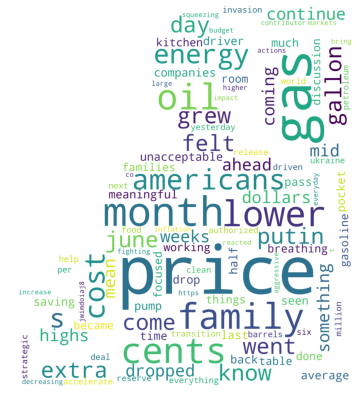

In [10]:
biden_img_path = "joebiden.png"
show_word_cloud(biden_tweet_df, biden_img_path)

###**Data Collection by Geolocation**

In [17]:
def collect_tweets(keywords, location, from_date, dst_file, limit = 50):

  # configure
  c = twint.Config()

  # get tweets published from a set date
  c.Since = from_date

  # keyword to search
  c.Search = keywords

  # geolocation to retrieve tweets from
  c.Geo = location

  # number of tweets to retrieve
  c.Limit = limit

  # store collected tweets as json file 
  c.Output = dst_file
  c.Store_json = True

  # run twint
  twint.run.Search(c)

Procedure: search for tweets about "gas prices" from a radius of 3371926km within the United States. The tweets were retrieved from 20:30hrs on 1st of March, 2022.

Result: 60 tweets were retrieved. This is approximately 9 times the tweets retrieved from a specific user (Joe Biden) and more useful in guaging public opinion about a prevalent issue.

In [19]:
keywords = "gas prices"
location = "39.08776,-98.58605,3371926km"
from_date = "2022-03-1 20:30:15"
dst_file = "./usa_gas_prices.json"

collect_tweets(keywords, location, from_date, dst_file)

1591549871374618624 2022-11-12 21:53:53 +0000 <mas__n> @BrendanBuffet @CoulierGeorge @Rob_roborob @ksorbs I wouldn’t care at all what he sounds like or how he pronounces his words if the economy was in a good state, inflation wasn’t at an all time high, gas prices, etc. etc. etc. etc.  But here we are.
1591549349229649920 2022-11-12 21:51:49 +0000 <snapdragon16> @BuzzPatterson Yup, we noticed Right wing media has also dropped gas prices, baby formula, the Border and Fentanyl. Amazing how they’re not concerns anymore.
1591548839202357254 2022-11-12 21:49:47 +0000 <EstopinalCathy> @GoexFFFg Praying for all because if we don’t win the house plenty people will be cold with no propane, diesel and gas prices higher. The middle class people can’t afford total electric cars. With every 3yrs a new battery that costs is 30,000.  Come on little state doesn’t make that.
1591544965515325440 2022-11-12 21:34:23 +0000 <Sith__Lordy> @BuzzPatterson It's amazing how quiet the open border record crime ga

In [20]:
usa_tweet_df = convert_to_df("usa_gas_prices.json")

show_tweets(usa_tweet_df)

Username: mas__n
Tweet: @BrendanBuffet @CoulierGeorge @Rob_roborob @ksorbs
I wouldn’t care at all what he sounds like or how
he pronounces his words if the economy was in a
good state, inflation wasn’t at an all time high,
gas prices, etc. etc. etc. etc.  But here we are.


Username: snapdragon16
Tweet: @BuzzPatterson Yup, we noticed Right wing media
has also dropped gas prices, baby formula, the
Border and Fentanyl. Amazing how they’re not
concerns anymore.


Username: estopinalcathy
Tweet: @GoexFFFg Praying for all because if we don’t win
the house plenty people will be cold with no
propane, diesel and gas prices higher. The middle
class people can’t afford total electric cars.
With every 3yrs a new battery that costs is
30,000.  Come on little state doesn’t make that.




###**Show key elements with word cloud**

Procedure: create a wordcloud with usa png image as mask.

Result: terms like "high", "gas", "inflation", "prices", "economy",  "issue", "biden" and "crime" suggests that the public are worried about gas prices and perhaps blame Joe Biden and the democrats.

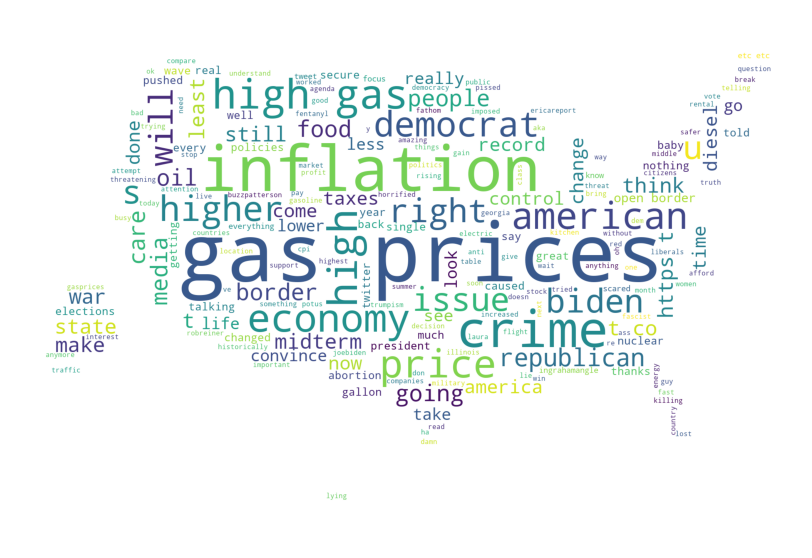

In [21]:
us_img_path = 'usa_map.png'
show_word_cloud(usa_tweet_df, us_img_path, fig_size=(25, 10))

###**Buhari's tweets about climate change**

Procedure: search for Buhari's tweets about "climate change" from his official Twitter account with username "MBuhari". The tweets were retrieved from 20:30hrs on 1st of March, 2022.

Result: 19 tweets were retrieved. Buhari seems to be tweeting a lot about climate change. The recent cop27 may be the reason for this.

In [26]:
tw_username = 'MBuhari'
keywords = 'climate change'
from_date = '2022-03-1 20:30:15'
dst_file = './buhari_climate_tweets.json'

collect_tweets_from_user(tw_username, keywords, from_date, dst_file)

1590739619754438656 2022-11-10 16:14:14 +0000 <MBuhari> While such projects have their uses, far more money needs to go to helping Africa adapt to the effects of climate change — which seems only fair for a continent that produces less than 3 percent of global emissions.
1590739591266721793 2022-11-10 16:14:07 +0000 <MBuhari> First, rich countries should direct a greater share of funding to developing nations’ adaptation to the effects of climate change. Most financing currently flows toward mitigation projects, such as renewable energy projects, that reduce emissions.
1590739337637146624 2022-11-10 16:13:07 +0000 <MBuhari> According to the United Nations, Africa is the continent worst affected by climate change despite contributing the least to it.
1590738671149338627 2022-11-10 16:10:28 +0000 <MBuhari> Together with drought-driven famine in the Horn of Africa, cascading wildfires across the North and wave upon wave of intensifying cyclones in the South, climate disasters in Africa fo

In [28]:
buhari_tweet_df = convert_to_df("buhari_climate_tweets.json")
buhari_tweet_df

,date,username,tweet
0,2022-11-10,mbuhari,"While such projects have their uses, far more ..."
1,2022-11-10,mbuhari,"First, rich countries should direct a greater ..."
2,2022-11-10,mbuhari,"According to the United Nations, Africa is the..."
3,2022-11-10,mbuhari,Together with drought-driven famine in the Hor...
4,2022-11-10,mbuhari,How Not To Talk With Africa About Climate Chan...
5,2022-10-01,mbuhari,This administration embarked on addressing cri...
6,2022-09-28,mbuhari,"I am confident that the Council will, ahead of..."
7,2022-09-28,mbuhari,I must point out that there are some noticeabl...
8,2022-09-28,mbuhari,Our Administration remains very committed to N...
9,2022-09-28,mbuhari,"I also approved, on 25th July 2022, the appoin..."


In [29]:
show_tweets(buhari_tweet_df)

Username: mbuhari
Tweet: While such projects have their uses, far more
money needs to go to helping Africa adapt to the
effects of climate change — which seems only fair
for a continent that produces less than 3 percent
of global emissions.


Username: mbuhari
Tweet: First, rich countries should direct a greater
share of funding to developing nations’ adaptation
to the effects of climate change. Most financing
currently flows toward mitigation projects, such
as renewable energy projects, that reduce
emissions.


Username: mbuhari
Tweet: According to the United Nations, Africa is the
continent worst affected by climate change despite
contributing the least to it.




###**Wordcloud of Buhari's climate tweets**

Procedure: create a wordcloud with Buhari's png image as mask.

Result: the text did not wrap around the image.  Generic terms like "africa", "climate change", "administration", "cop27", "nigeria" emerged from the analysis. This suggests a general concern for climate change in relation to Nigeria and Africa.

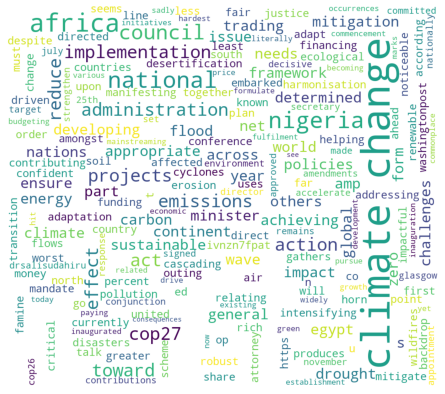

In [31]:
buhari_img_path = "buhari.png"
show_word_cloud(buhari_tweet_df, buhari_img_path)

###**Tweets about climate change from Nigeria**

Procedure: search for tweets about "climate change" from a radius of 459008km within Nigeria. The tweets were retrieved from 20:30hrs on 1st of March, 2022.

Result: 60 tweets were retrieved. This is approximately 3 times the tweets retrieved from a specific user (Muhammadu Buhari). 

In [32]:
keywords = "climate change"
location = "9.25394,7.19971,459008km"
from_date = "2022-03-1 20:30:15"
dst_file = "./nigeria_climate_tweets.json"

collect_tweets(keywords, location, from_date, dst_file)

1591556976902918147 2022-11-12 22:22:07 +0000 <OBASIJO95783370>  https://t.co/gUoHjZqFf4 @Momentum_UNFCCC @POTUS @UNFCCC @_AfricanUnion @CANIntl  https://t.co/ygu7aHYXrs
1591556777233072132 2022-11-12 22:21:20 +0000 <9aufal> Climate Change: Western countries are hypocrites, can’t dictate to Africa – Buhari
1591552164014739456 2022-11-12 22:03:00 +0000 <Legacyrach> @SophiaKianni @UN @UNFCCC You do it elso else !
1591551532927000576 2022-11-12 22:00:29 +0000 <ThinkGreencmr> We are at the Cop 27 which is currently being held in Sharm el sheick in Egypt.  an event that brings together heads of state from around the world, international organizations,  and individuals to highlight topics aimed at effectively combating climate change. #cop27 #thinkgreen  https://t.co/DizpsBKUnQ
1591550345771106305 2022-11-12 21:55:46 +0000 <Teejay2rule> Adenike is a Nigerian climate activist demanding justice for communities facing the worst effects of climate change. Add your name to her petition for world 

In [33]:
ng_tweet_df = convert_to_df("nigeria_climate_tweets.json")

show_tweets(ng_tweet_df)

Username: obasijo95783370
Tweet:  https://t.co/gUoHjZqFf4 @Momentum_UNFCCC @POTUS
@UNFCCC @_AfricanUnion @CANIntl
https://t.co/ygu7aHYXrs


Username: 9aufal
Tweet: Climate Change: Western countries are hypocrites,
can’t dictate to Africa – Buhari


Username: legacyrach
Tweet: @SophiaKianni @UN @UNFCCC You do it elso else !




###**Wordcloud of climate tweets from Nigeria**

Procedure: create a wordcloud with nigeria png image as mask.

Result: the text did not wrap properly around the image. Asides climate change and cop27, few terms emerge from this analysis. There is a cluster of terms "environmental", "understand", "buhari" and "africa". There seems to be a general discussion about climate change in Nigeria because of cop27.

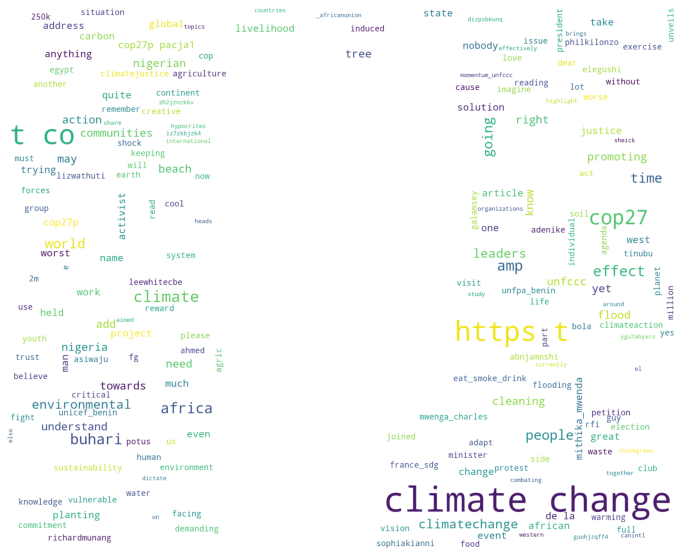

In [34]:
naija_img_path = 'nigeria.png'
show_word_cloud(ng_tweet_df, naija_img_path, fig_size=(25, 10))